In [1]:
import os 
os.chdir("/home/canyon/Bus-Weather-Impacts")
from src.utils import *
import pandas as pd
import os
import osmnx as ox
import geopandas as gpd
import networkx as nx
from sklearn.neighbors import KDTree
import numpy as np
from plotnine import *

In [3]:
sensors_raw = pd.read_excel("/home/data/bus-weather/FloodNet Sensor Locations Directory - 11-14-23.xlsx")

In [4]:
sensors_raw

,Borough,Neighbourhood,Street,lat,lng,mounted_to,mounted_over,Install Date,Requestor
0,Brooklyn,Gowanus,Hoyt & 5th,40.676672,-73.994591,drive rail,sidewalk,2020-10-05,NaN
1,Brooklyn,Gowanus,Gowanus Canal,40.674545,-73.994586,drive rail,canal,2021-07-15,NaN
2,Brooklyn,Gowanus,Smith & 9th,40.673652,-73.995398,drive rail,sidewalk,2021-12-14,NaN
3,Brooklyn,Gowanus,Carroll & 4th,40.676281,-73.984089,drive rail,sidewalk,2021-07-15,NaN
4,Brooklyn,Gowanus,4th & Garfield,40.675855,-73.983944,drive rail,sidewalk,2021-07-15,NaN
...,...,...,...,...,...,...,...,...,...
78,Queens,Kisenna Park,Peck Ave/ 153rd st,40.745617,-73.814417,drive rail,sidewalk,2023-10-26,DEP
79,Queens,Utopia,160th St/72nd Ave,40.728059,-73.808914,drive rail,sidewalk,2023-10-26,DEP
80,Queens,Utopia,Utopia Pkwy/ 67th Ave,40.734539,-73.793374,drive rail,sidewalk,2023-10-26,DEP
81,Queens,Hollis,183rd St/90th Ave,40.711128,-73.777904,drive rail,sidewalk,2023-10-26,NaN


In [6]:
sensors_gdf = gpd.GeoDataFrame(sensors_raw, geometry=gpd.points_from_xy(sensors_raw['lng'], sensors_raw['lat'])).set_crs(4326)

In [16]:
sensors_gdf.to_crs(epsg=5070)

,Borough,Neighbourhood,Street,lat,lng,mounted_to,mounted_over,Install Date,Requestor,geometry
0,Brooklyn,Gowanus,Hoyt & 5th,40.676672,-73.994591,drive rail,sidewalk,2020-10-05,NaN,POINT (1828162.947 2175392.994)
1,Brooklyn,Gowanus,Gowanus Canal,40.674545,-73.994586,drive rail,canal,2021-07-15,NaN,POINT (1828218.023 2175161.235)
2,Brooklyn,Gowanus,Smith & 9th,40.673652,-73.995398,drive rail,sidewalk,2021-12-14,NaN,POINT (1828174.707 2175048.253)
3,Brooklyn,Gowanus,Carroll & 4th,40.676281,-73.984089,drive rail,sidewalk,2021-07-15,NaN,POINT (1829029.868 2175552.407)
4,Brooklyn,Gowanus,4th & Garfield,40.675855,-73.983944,drive rail,sidewalk,2021-07-15,NaN,POINT (1829052.635 2175508.778)
...,...,...,...,...,...,...,...,...,...,...
78,Queens,Kisenna Park,Peck Ave/ 153rd st,40.745617,-73.814417,drive rail,sidewalk,2023-10-26,DEP,POINT (1841073.282 2186385.244)
79,Queens,Utopia,160th St/72nd Ave,40.728059,-73.808914,drive rail,sidewalk,2023-10-26,DEP,POINT (1841976.644 2184578.775)
80,Queens,Utopia,Utopia Pkwy/ 67th Ave,40.734539,-73.793374,drive rail,sidewalk,2023-10-26,DEP,POINT (1843074.990 2185586.087)
81,Queens,Hollis,183rd St/90th Ave,40.711128,-73.777904,drive rail,sidewalk,2023-10-26,NaN,POINT (1844943.019 2183335.652)


In [19]:
sensors_gdf.total_bounds[[1, 3]] - .1

array([40.4731887, 40.753371 ])

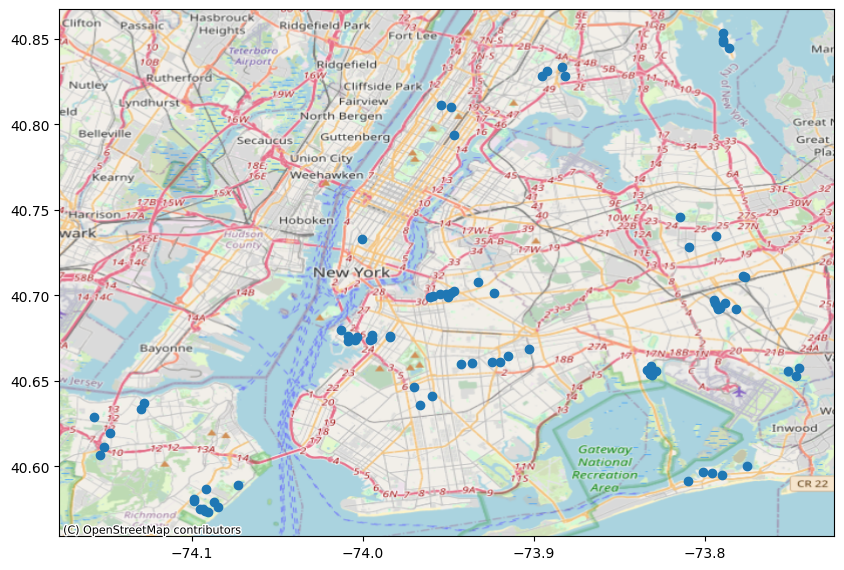

In [20]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sensors_gdf.plot(ax=ax)

ctx.add_basemap(ax, crs=sensors_gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

plt.show()

In [13]:
import xyzservices.providers as xyz

# List all available providers
list(xyz.keys())


['OpenStreetMap',
 'MapTilesAPI',
 'OpenSeaMap',
 'OPNVKarte',
 'OpenTopoMap',
 'OpenRailwayMap',
 'OpenFireMap',
 'SafeCast',
 'Stadia',
 'Thunderforest',
 'CyclOSM',
 'Jawg',
 'MapBox',
 'MapTiler',
 'TomTom',
 'Esri',
 'OpenWeatherMap',
 'HERE',
 'HEREv3',
 'FreeMapSK',
 'MtbMap',
 'CartoDB',
 'HikeBike',
 'BasemapAT',
 'nlmaps',
 'NASAGIBS',
 'NLS',
 'JusticeMap',
 'GeoportailFrance',
 'OneMapSG',
 'USGS',
 'WaymarkedTrails',
 'OpenAIP',
 'OpenSnowMap',
 'AzureMaps',
 'SwissFederalGeoportal',
 'Gaode',
 'Strava',
 'OrdnanceSurvey']